[Accueil](../../../index.ipynb) > [NSI Terminale](../../index.ipynb)

# Algorithmes sur les graphes

## Utilisation de la librairie networkx

Nous pourrions utiliser une liste de dictionnaires pour implémenter nos graphes, mais nous allons utiliser la librairie [networkx](https://networkx.org/documentation/stable/tutorial.html).

Pour représenter nos graphes nous allons utiliser la librairie [matplotlib](https://matplotlib.org/).

Voici, ci-dessous, le fonctionnement de base des 2 librairies.

Les noeuds sont : ['A', 'B', 'C', 'D']
Les voisins de A sont : ['B', 'C']
Le poids de AB est 40


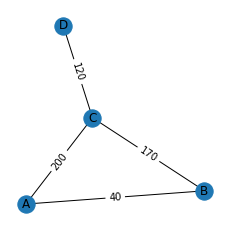

In [105]:
import matplotlib.pyplot as plt
import networkx as nx

# instanciation d'un graphe
graphe = nx.Graph()

# ajout des arêtes pondérées
edges = [('A', 'B', 40),
         ('A', 'C', 200),
         ('B', 'C', 170),
         ('C', 'D', 120),
        ]
for edge in edges:
    graphe.add_edge(edge[0], edge[1], weight=edge[2])


# quelques méthodes utiles sur le graphes         
print(f"Les noeuds sont : {[node for node in graphe]}")
print(f"Les voisins de A sont : {[n for n in graphe.neighbors('A')]}")
print(f"Le poids de AB est {graphe['A']['B']['weight']}")


# Affichage du graphe pondéré
plt.figure(figsize=(3,3))
pos = nx.nx_agraph.graphviz_layout(graphe)
# dessin du graphe
nx.draw(graphe, pos, with_labels=True)
# dessins des poids
nx.draw_networkx_edge_labels(graphe, pos, edge_labels = nx.get_edge_attributes(graphe,'weight'))
plt.show()

## Parcours de graphes

Parcourir un graphe consiste à lister tous les sommets de ce graphe. On peut parcourir un graphe en **largeur (BFS)** ou en **profondeur (DFS)**.

Nous allons parcourir le graphe ci-dessous pour nos parcours.

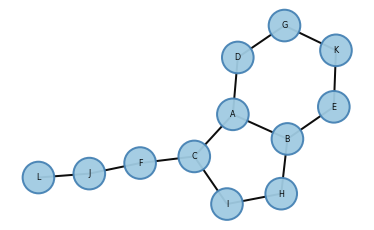

In [159]:
import matplotlib.pyplot as plt
import networkx as nx

# Instantiation d'un graphe
G1 = nx.Graph()
edges = [('A', 'B'),
         ('A', 'C'),
         ('A', 'D'),
         ('B', 'E'),
         ('C', 'F'),
         ('C', 'I'),
         ('D', 'G'),
         ('B', 'H'),
         ('H', 'I'),
         ('F', 'J'),
         ('E', 'K'),
         ('K', 'G'),
         ('J', 'L'),
        ]
# Ajout des arêtes pondérés
for edge in edges:
    G1.add_edge(edge[0], edge[1])

    
# rendu du graphe
options = {
    "font_size": 8,
    "node_size": 1000,
    "edgecolors": "#4682B4",
    "alpha": 0.95,
    "linewidths": 2,
    "width": 2,
}
plt.figure(figsize=(5,3))

pos = nx.nx_agraph.graphviz_layout(G1)
color_map=['#A0CBE2' for node in G1]
#color_map=['#FFA500' if node=='A' else '#A0CBE2' for node in G]
nx.draw(G1, pos, node_color=color_map, with_labels=True, **options)

plt.show()

### Parcours en largeur BFS (Breadth First Search)

L'idée du parcours en largeur repose sur l'utilisation d'une **file**.
Le parcours commence par un noeud source puis ses successeurs non explorés, puis les sucesseurs non explorés des successeurs...

#### Algorithme en pseudo-code

**Entrées de l'algorithme**: 

- un graphe $G$
- $n_{dep}$ le noeud de départ

**Sortie**:

- un dictionnaire $dist$ comportant chaque noeud avec leur distance à $n_{dep}$

**Début**:

- $f$ : une file vide
- $dist$ : un dictionnaire initialisé à $dist[n_{dep}]=0$
- on enfile le sommet $n_{dep}$ dans $f$
- TANT qu'il existe un noeud dans la file $f$:
  - $n_{courant}$ ← dépile la file $f$
  - POUR chaque $voisin$ de $s_{courant}$:
    - SI $voisin$ n'est pas dans $dist$:
      - on enfile $voisin$ dans $f$
      - $dist[voisin]$ ← $dist[n_{courant}]+1$
    - fin de SI
  -fin POUR
- fin TANT QUE
- retourner $dist$

#### Implémentation en Python

In [160]:
def BFS(graph, node):
    f = [node]
    dist={node:0}
    while len(f)>0:
        current = f.pop()
        for neighbor in graph.neighbors(current):
            if neighbor not in dist:
                f.insert(0, neighbor)
                dist[neighbor] = dist[current]+1
    return dist
BFS(G1, 'A')

{'A': 0,
 'B': 1,
 'C': 1,
 'D': 1,
 'E': 2,
 'H': 2,
 'F': 2,
 'I': 2,
 'G': 2,
 'K': 3,
 'J': 3,
 'L': 4}

#### utilisation

Le parcours en largeur permet d'obtenir les **longeurs des chemins les plus courts** d'un noeud vers les autres noeuds du graphe.

**Exercice** : Ecrire la fonction *parcours_chemin(G, node)* qui retourne un dictionnaire associant à chaque sommet visité son prédécesseur.

In [161]:
def parcours_chemin(graph, node):
    if node not in graph.nodes:
        return {}
    f = [node]
    parcours={node:None}
    while len(f)>0:
        current = f.pop()
        for neighbor in graph.neighbors(current):
            if neighbor not in parcours:
                f.insert(0, neighbor)
                parcours[neighbor] = current
    return parcours
depart = 'A'
parcours_chemin(G1, depart)

{'A': None,
 'B': 'A',
 'C': 'A',
 'D': 'A',
 'E': 'B',
 'H': 'B',
 'F': 'C',
 'I': 'C',
 'G': 'D',
 'K': 'E',
 'J': 'F',
 'L': 'J'}

**Exercice** : Ecrire la fonction *chemin(G, start, end)* qui utilise la fonction *parcours_chemin* et qui retourne sous forme de liste le plus court chemin allant de *start* à *end*.

In [162]:
def chemin(G, start, end):
    predecesseurs = parcours_chemin(G, start)
    if not predecesseurs or end not in G.nodes:
        return []
    current = end
    path=[current]
    while current != start:
        predecesseur = predecesseurs.get(current)
        if predecesseur:
            path.insert(0, predecesseur)
            current = predecesseur
    return path

['L', 'J', 'F', 'C', 'A', 'B', 'E', 'K']


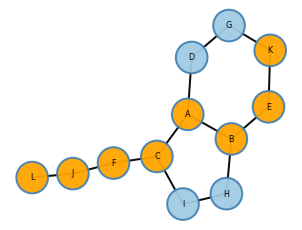

In [163]:
path=chemin(G1, "L", "K")
print(path)
plt.figure(figsize=(4,3))

pos = nx.nx_agraph.graphviz_layout(G1)
color_map=['#FFA500' if node in path else '#A0CBE2' for node in G1]
nx.draw(G1, pos, node_color=color_map, with_labels=True, **options)

plt.show()

### Parcours en profondeur DFS (Depth First Search)


Le **parcours en profondeur** d’un graphe à partir d’un sommet consiste à suivre les arêtes arbitrairement, en marquant les sommets déjà visités pour ne pas les visiter à nouveau.

#### Algorithme récursif en pseudo-code

**Entrées de l'algorithme**: 

- $G$ : un graphe
- $noeud$ :  noeud de départ

**Sortie**:

- *noeuds_visites* : une liste  comportant la liste des noeuds visités

**Début**:

- *noeuds_visites* : une liste vide
- SI $noeud$ n'est pas dans la liste $noeuds_visites$
  - on l'ajoute dans *noeuds_visites*
  - POUR chaque $voisin$ des voisins de $noeud$:
      - on appelle la fonction avec $voisin$ en paramètre
    -fin POUR
- fin SI
- retourner *noeuds_visites*

#### Implémentation récursive en Python

In [185]:
def DFS_rec(g, noeud, noeuds_visites=None):
    if noeuds_visites == None:
        noeuds_visites = []
    if noeud not in noeuds_visites:
        noeuds_visites.append(noeud)
        for voisin in g.neighbors(noeud):
            DFS_rec(g, voisin, noeuds_visites)
    return noeuds_visites

In [186]:
noeuds_visites = DFS_rec(G1, "A")
print(noeuds_visites)

['A', 'B', 'E', 'K', 'G', 'D', 'H', 'I', 'C', 'F', 'J', 'L']


#### Implémentation itérative en Python

In [187]:
def DFS_iter(g, noeud):
    if not(noeud in g.nodes):
        return None
    pile = [noeud]
    liste_sommets = []
    while len(pile) != 0:
        s = pile.pop()
        liste_sommets.append(s)
        for voisin in g.neighbors(s):
            if not(voisin in liste_sommets) and not(voisin in pile):
                pile.append(voisin)
    return liste_sommets


In [188]:
print(DFS_iter(G1, "A"))

['A', 'D', 'G', 'K', 'E', 'C', 'I', 'H', 'F', 'J', 'L', 'B']


#### Recherche de cycles

A Faire


## Algorithme de Dijkstra

<div style="float:right; border:1px solid black; margin-right:10px"><img src="img/dijkstra.jpg" title="Edsger Dijkstra"></div>

**L'algorithme de Dijkstra** sert à résoudre le problème des **plus courts chemins** (Par exemple dans un graphe pondéré qui lie des villes entre elles). A partir d'un noeud dans un graphe orienté, il permet de connaitre le plus court chemin vers l'ensemble des autres noeuds du graphe.

On peut evidemment l'utiliser pour déterminer **le plus court chemin** d'un noeud vers UN autre dans un graphe non orienté.

Cet algorithme a été inventé par l'informaticien néerlandais **[Edsger Dijkstra](https://fr.wikipedia.org/wiki/Edsger_Dijkstra)** (1930-2002) et a été publié en 1959.

### Applications

- Calcul des itinéraires routiers
  - poids = distance pour le chemin le plus court
  - poids = temps pour le chemin le plus rapide
  - poids = distance + peage pour le chemin le plus économique
- Calcul de routes sur internet
- ...

Une [vidéo sur l'algorithme de Dijkstra](https://youtu.be/MybdP4kice4) (3"44')

[Une deuxième vidéo en anglais](https://youtu.be/pVfj6mxhdMw) (10"51')

### Exemple

Dans le graphe ci-dessous nous recherchons les distances au noeud A.

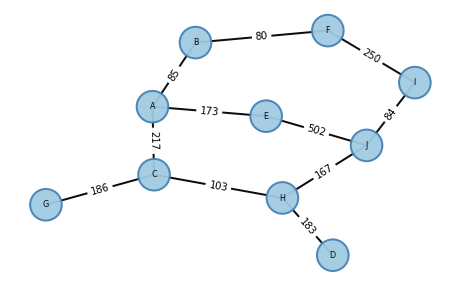

In [41]:
import matplotlib.pyplot as plt
import networkx as nx

# Instantiation d'un graphe
G2 = nx.Graph()
edges = [('A', 'B', 85),
         ('A', 'C', 217),
         ('A', 'E', 173),
         ('B', 'F', 80),
         ('C', 'H', 103),
         ('C', 'G', 186),
         ('D', 'H', 183),
         ('E', 'J', 502),
         ('F', 'I', 250),
         ('H', 'J', 167),
         ('I', 'J', 84),
        ]
# Ajout des arêtes pondérés
for edge in edges:
    G2.add_edge(edge[0], edge[1], weight=edge[2])

    
# rendu du graphe
options = {
    "font_size": 8,
    "node_size": 1000,
    "edgecolors": "#4682B4",
    "alpha": 0.95,
    "linewidths": 2,
    "width": 2,
}
plt.figure(figsize=(8,5))
plt.axis('off')

edge_labels = nx.get_edge_attributes(G2,'weight')
pos = nx.nx_agraph.graphviz_layout(G2)
color_map=['#A0CBE2' for node in G2]
#color_map=['#FFA500' if node=='A' else '#A0CBE2' for node in G]
nx.draw(G2, pos, node_color=color_map, with_labels=True, **options)
nx.draw_networkx_edge_labels(G2, pos, edge_labels = edge_labels)

plt.show()

| à A   | à B      |  à C    | à D     | à E     | à F     | à G     | à H     | à I     | à J                        | file de priorité    |
|-------|----------|---------|---------|---------|---------|---------|---------|---------|----------------------------|---------------------|
|**0A** |∞         |∞        |∞        |∞        |∞        |∞        |∞        |∞        |∞                           |\[<u>A</u>\]         |
|-      |**85A**   |217A     |∞        |173A     |∞        |∞        |∞        |∞        |∞                           |\[<u>B</u>, C, E\]   |
|-      |-         |217A     |∞        |173A     |**165B** |∞        |∞        |∞        |∞                           |\[C, E, <u>F</u>\]   |
|-      |-         |217A     |∞        |**173A** |-        |∞        |∞        |415F     |∞                           |\[C, <u>E</u>, I\]   |
|-      |-         |**217A** |∞        |-        |-        |∞        |∞        |415F     |675E                        |\[<u>C</u>, I, J\]   |
|-      |-         |-        |∞        |-        |-        |403C     |**320C** |415F     |675E                        |\[G, <u>H</u>, I, J\]|
|-      |-         |-        |503H     |-        |-        |**403C** |-        |415F     |<strike>675E</strike> 487H  |\[D, <u>I</u>, I,J\] |
|-      |-         |-        |503H     |-        |-        |-        |-        |**415F** |487H                        |\[D, <u>I</u>, J\]   |
|-      |-         |-        |503H     |-        |-        |-        |-        |-        |**487H**                    |\[D, <u>J</u>\]      |
|-      |-         |-        |**503H** |-        |-        |-        |-        |-        |-                           |\[<u>D</u>\]         |
|-      |-         |-        |-        |-        |-        |-        |-        |-        |-                           |\[\]                 |

De ce tableau on tire donc les **distances minimales** de A vers les autres noeuds du graphe ainsi que les **prédecesseurs de chaque noeud**.

| noeud | prédécesseur | distance |
|-------|--------------|----------|
| A     |              | 0        |
| B     | A            | 85       |
| C     | A            | 165      |
| D     | H            | 503      |
| E     | A            | 217      |
| F     | B            | 165      |
| G     | C            | 403      |
| H     | C            | 320      |
| I     | F            | 415      |
| J     | H            | 487      |

Pour déterminer le **chemin emprunté**, on remonte les **prédécesseurs**.

Par exemple le chemin le plus court de A vers J est J <- H <- C <- A.

### **Exercice**

- Dérouler l'algorithme de Djikstra pour le graphe ci-dessous.
- Déterminer les longueurs des plus courts chemins en partant de A.
- Déterminer le chemin de A vers K

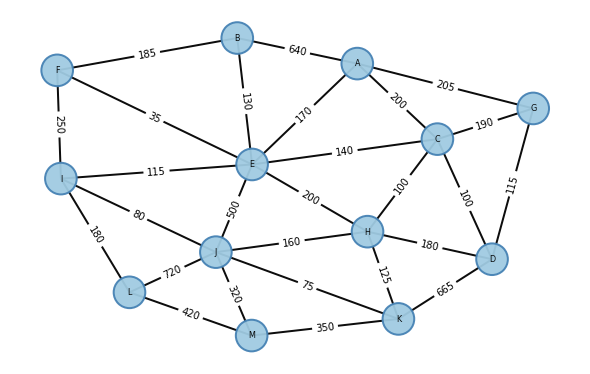

In [59]:
G3 = nx.Graph()
edges = [('A', 'B', 640),
         ('A', 'C', 200),
         ('A', 'E', 170),
         ('A', 'G', 205),
         ('B', 'E', 130),
         ('B', 'F', 185),
         ("C", "D", 100),
         ('C', 'E', 140),
         ('C', 'H', 100),
         ('C', 'G', 190),
         ('D', 'H', 180),
         ('D', 'G', 115),
         ("D", "K", 665),
         ("E", "F", 35),
         ("E", "H", 200),
         ('E', 'I', 115),
         ('E', 'J', 500),
         ('F', 'I', 250),
         ('H', 'J', 160),
         ('H', 'K', 125),
         ('I', 'J', 80),
         ('I', 'L', 180),
         ("J", "K", 75),
         ("J", "L", 720),
         ("J", "M", 320),
         ("K", "M", 350),
         ("L", "M", 420),
        ]


# Ajout des arêtes pondérés
for edge in edges:
    G3.add_edge(edge[0], edge[1], weight=edge[2])

pos = nx.spring_layout(G3, seed=1234)
edge_labels = nx.get_edge_attributes(G3,'weight')
color_map=['#A0CBE2' for node in G3]
plt.figure(figsize=(8,5))
nx.draw(G3, pos, with_labels=True, node_color=color_map, **options)
nx.draw_networkx_edge_labels(G3, pos, edge_labels = edge_labels)
plt.show()

### Pseudo code

**Entrées de l'algorithme**: 

- un graphe $G$ avec une pondération positive de poids
- $s_{deb}$ le sommet de début du graphe $G$

**Sortie**:

- un couple contant :
  - un dictionnaire $p$ des prédécesseurs
  - un dictionnaire $d$ des distances

**Début**:

- $d$ : un dictionnaire des distances avec $d[s]=+\infty$ pour chaque sommet $s$ et $d[s_{deb}]=0$
- $p$ : un dictionnaire des prédecesseurs  avec $p[s]=None$ pour chaque sommet $s$
- $f$ : une file de priorité à laquelle on ajoute $(s_{deb}, 0)$
- Tant qu'il existe un sommet dans la file $f$:
  - on dépile le couple $(s_{courant}, d_{courante})$
  - pour chaque ($voisin$, $d_{voisin}$) de $s_{courant}$:
    - on incrémente la $d_{courante}$ de $d_{voisin}$
    - si la $d_{courante} < d[voisin]$:
      - $d[voisin]$ ← $d_{courante}$
      - $p[voisin]$ ← $s_{courant}$
      - on empile $(voisin, d_{courante})$ dans la file $f$
  -fin Pour
- fin Tant que
- renvoyer $(p, d)$

### Implémentation de l'algorithme en Python

#### Implémentation d'une file de priorité en Python

Python possède un module qui permet de modéliser une file de priorité. [Voir documentation de heapq](https://docs.python.org/fr/3/library/heapq.html) et la génération des graphes dans ce cours.

In [26]:
import heapq

h = []
heapq.heappush(h, (2, 'A'))
heapq.heappush(h, (1, 'B'))
heapq.heappush(h, (5, 'C'))
heapq.heappop(h)

(1, 'B')

#### Implémentation de l'infini

La valeur $+\infty$ est définie par **float('infinity')**

In [27]:
a = float('infinity')
a>10*99

True

In [61]:
import heapq

def dijkstra(graph, start):
    # les dictionnaires des prédécesseurs et des distances
    p = {node:None for node in graph}
    d = {node:float('infinity') for node in graph}
    d[start] = 0
    f = [(0, start)]
    while len(f) > 0:
        current_distance, current_node = heapq.heappop(f)
        for neighbor in graph.neighbors(current_node):
            distance = current_distance + graph[current_node][neighbor]['weight']
            # on considère ce noeud si sa distance est inférieure à celle existante
            if distance < d[neighbor]:
                d[neighbor] = distance
                p[neighbor] = current_node
                heapq.heappush(f, (distance, neighbor))
    return p, d  

depart = 'A'
predecessors, distances = dijkstra(G3, depart)


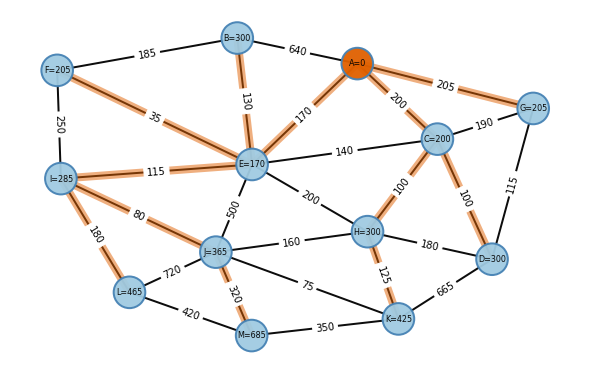

In [62]:

pos = nx.spring_layout(G3, seed=1234)
edge_labels = nx.get_edge_attributes(G3,'weight')
color_map=['#e06000' if node==depart else '#A0CBE2' for node in G3]
labels={node:node+"="+str(distances[node]) for node in G3.nodes()}
plt.figure(figsize=(8,5))
nx.draw(G3, pos, labels=labels, node_color=color_map, **options)
edgelist = [(node, pred) for node, pred in predecessors.items() if pred]
nx.draw_networkx_edges(
    G3,
    pos,
    edgelist=edgelist,
    width=8,
    alpha=0.5,
    edge_color="#e06000",
)
nx.draw_networkx_edge_labels(G3, pos, edge_labels = edge_labels)
plt.axis('off')
plt.show()

Le réseau des chemins les plus courts est un [arbre couvrant](https://fr.wikipedia.org/wiki/Arbre_couvrant) du graphe, c'est à dire un arbre inclus dans le graphe et qui connecte tous les noeuds.